# Predict Customers Click on E-commerce Banner

Source    : https://www.dqlab.id/

Typed by  : Aulia Khalqillah

Objective : Does the new customers will access the banner or not?

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Load Data

In [2]:
data = pd.read_csv('ecommerce_banner_promo.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


We have to change format of Timestamp's feature to date-time format. 

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [5]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
n_male_gender = data[data['Male']==1]['Male'].count()
n_female_gender = data[data['Male']==0]['Male'].count()
n_gender = pd.DataFrame(
    [n_male_gender, n_female_gender],
    index=['Male','Female'],
    columns=['Number_of_Visitors']
)

n_gender

,Number_of_Visitors
Male,481
Female,519


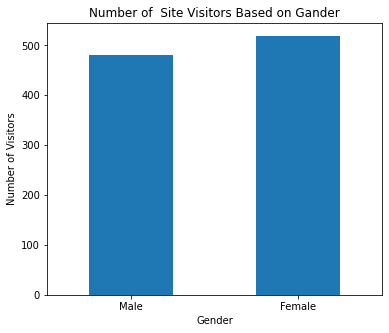

In [8]:
n_gender.plot(kind='bar',legend=None,figsize=(6,5))
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of Visitors')
plt.title('Number of  Site Visitors Based on Gander')
plt.show()

Based on data was given, we have 1000 data of customers who visit the website. There is no missing value in this data. As we can see, the average of daily time spent on site is 65.00 minutes, the average of customers age who visit this site is 36 years old (where the standard deviation is around 8.78 years old), Female is highest visitor and average of clicked on advertisement around 50% of chances.

** Calculate the correlation **

In [9]:
correlation = data.corr()
df_corr = correlation['Clicked on Ad'].drop('Clicked on Ad', axis=0).reset_index().rename(columns={'index':'Feature'}).sort_values('Clicked on Ad', ascending=False)
df_corr

,Feature,Clicked on Ad
1,Age,0.492531
4,Male,-0.038027
2,Area Income,-0.476255
0,Daily Time Spent on Site,-0.748117
3,Daily Internet Usage,-0.786539


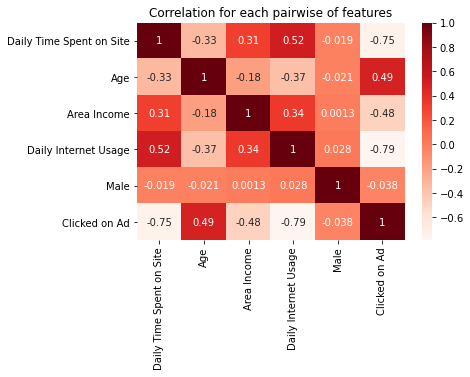

In [10]:
ax1 = sns.heatmap(correlation, annot=True, annot_kws={'size': 10}, cmap='Reds')
ax1.set_title('Correlation for each pairwise of features')
plt.show()

The clicked on advertisment is positive correlate to the age. This can be happend around 49% of chances, but it is not significantly high. It indicates the high age, the advertisment probably will be visited. As we can see, the clicked on advertisment is inverse correlation to the daily internet usage. It means, the short period of daily internet usage, the advertisment has a chances around 78% will be visited.

** Number of Clicked on Advertisment **

In [11]:
n_click_adv = data.groupby(['Clicked on Ad','Male']).size().reset_index()
n_click_adv.columns = ['Clicked on Ad','Male','Number of Visitors']
n_click_adv

,Clicked on Ad,Male,Number of Visitors
0,0,0,250
1,0,1,250
2,1,0,269
3,1,1,231


From 1000 site visitors, there 500 visitors who clicked the advertisment and 500 others didn't. Specifically, there are 269 female visitors and 231 male visitors clicked the advertisment.

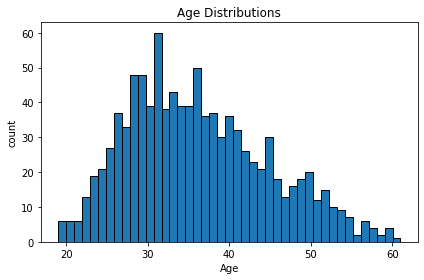

In [12]:
plt.hist(data['Age'], edgecolor='black', bins = data.Age.nunique())
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distributions')
plt.tight_layout()
plt.show()

The age of site visitors has range from 20 to 60. The age of site visitors are diminated in range 25 to 40 years old.

## Generate Model

In [13]:
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad','Daily Internet Usage','Area Income'], axis = 1)
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X.columns.tolist()

['Daily Time Spent on Site', 'Age', 'Male']

### Logistic Regressor

In [14]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
X_test

,Daily Time Spent on Site,Age,Male
521,63.26,29,1
737,71.23,52,0
740,43.63,38,1
660,42.04,49,0
411,78.68,29,0
...,...,...,...
408,51.68,49,0
332,56.30,49,1
208,59.51,58,0
613,76.21,31,1


** Model Performence **

In [15]:
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

Training Accuracy : 0.89375
Testing Accuracy : 0.915


** Confusion Matrix **

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('Total Test Number:', len(y_test))
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

Total Test Number: 200
True Negative: 85
False Positive: 4
False Negative: 13
True Positive: 98


In [17]:
confusion_matrix(y_test,y_pred)

array([[85,  4],
       [13, 98]])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        89
           1       0.96      0.88      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



### Decision Tree

In [19]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

** Model Performence **

In [20]:
print("Training Accuracy (Decision Tree Classifier):", dtree.score(X_train, y_train))
print("Testing Accuracy (Decision Tree Classifier):", dtree.score(X_test, y_test))

Training Accuracy (Decision Tree Classifier): 1.0
Testing Accuracy (Decision Tree Classifier): 0.875


** Confusion Matrix **

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('Total Test Number:', len(y_test))
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

Total Test Number: 200
True Negative: 81
False Positive: 8
False Negative: 17
True Positive: 94


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        89
           1       0.92      0.85      0.88       111

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



## Model Explanation Results

We generate a few models by using Logistic Regressor and Decision Tree methods. These model have tested by using data of ecommerce clicked on advertisement by visitors. The data is splitted into two parts, train data (80%) and test data (20%), where the model variables input are Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, and Male, and the target variable is Clicked on Ad.

First, we generate a model by using Logistic Regressor. By using this method, we get 89% accuracy of train data and 91% accuracy of test data. The Logistic Regressor method predicts the visitors who correct click on advertisement around 98 visitors of 200 visitors or 96% of total 102 visitors who predicted will click the advertisement and around 85 visitors of 200 visitors who did not click the advertisement or 87% of total 98 visitors who predicted did not click the advertisement.

Second, we generate a model by using Decision Tree Classifier. By using this method, we get 100% accuracy of train data and 87% accuracy of test data. The accuracy of test data is close to the accuracy of train data. The Decision Tree Classifier method predicts the visitors who correct click on advertisement around 94 visitors of 200 visitors or 92% of total 102 visitors who predicted will click the advertisement and around 81 visitors of 200 visitors who did not click the advertisement or 83% of total 98 visitors who predicted did not click the advertisement.

The result of Logistic Regressor is quite better than result of Decision Tree Classifier, because the accuracy of Logistic Regressor more consistent than Decision Tree Classifier.

** Conclusion **

The new visitors where the age in range 25-40 years old, female, and the daily time spent on site less than 65 minutes will be predicted to click the advertisement by 96% of chances

## Test A Model

In [33]:
dtss,age,male = [60,26,0]
test = pd.DataFrame([dtss,age,male],index=['Daily Time Spent on Site', 'Age', 'Male']).T
predict = logreg.predict(test)
predict.tolist()

[1]

The visitor 26 years old, **female**, and 60 minutes of daily time spent on site is predicted will click on advertisement.

In [34]:
dtss,age,male = [60,26,1]
test = pd.DataFrame([dtss,age,male],index=['Daily Time Spent on Site', 'Age', 'Male']).T
predict = logreg.predict(test)
predict.tolist()

[0]

The visitor 26 years old, **male**, and 60 minutes of daily time spent on site is predicted will not click on advertisement.